In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X=df.iloc[:,:8]
y=df.iloc[:,-1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

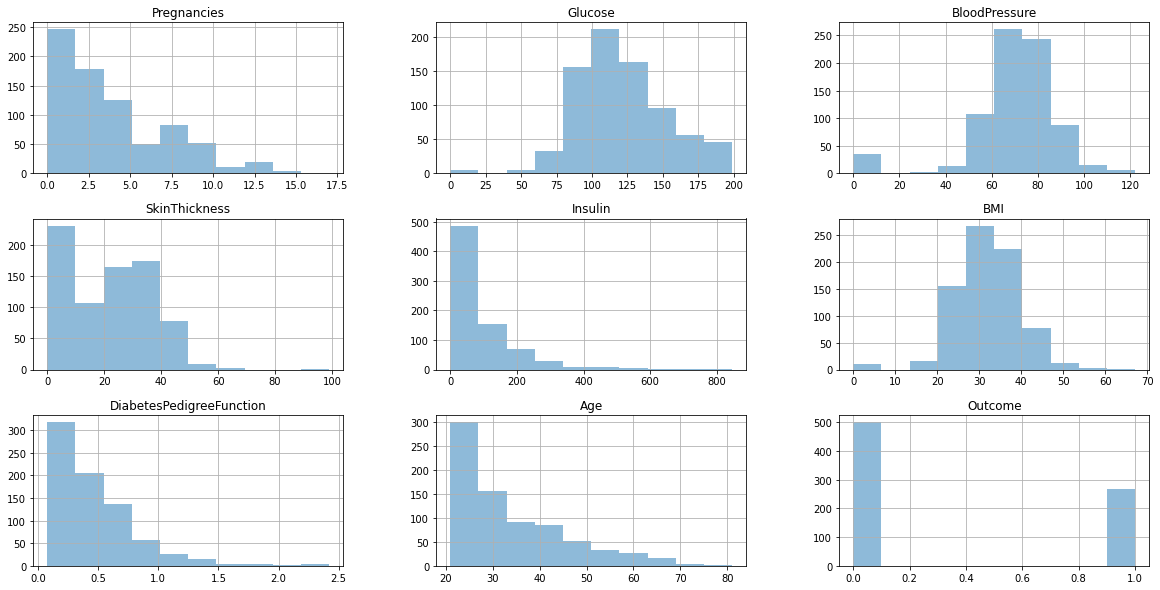

In [ ]:
# Plotting the histograms of each variable
from matplotlib import pyplot
df.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

Gaussian Distribution — BMI, BloodPressure, Glucose.

Non-Gaussian Distribution — Age, DiabetesPedigreeFunction, Insulin, Pregnancies, SkinThickness.

Therefore, Normalize Non-Gaussian features and Standardize Gaussian-like features

To apply this strategy, we are going to use Column Transformer and Pipeline concepts from sklearn as we need to do the mixed type of techniques by subsetting the columns.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

Standardize_Var = ['BMI','BloodPressure', 'Glucose']
Standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])

Normalize_Var = ['Age','DiabetesPedigreeFunction','Insulin','Pregnancies','SkinThickness']
Normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

preprocessor = ColumnTransformer(transformers = [('standard', Standardize_transformer, Standardize_Var), ('norm', Normalize_transformer, Normalize_Var)])
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(solver='lbfgs'))])
clf.fit(X, y)

# print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'.format(clf.score(X_test, y_test)))

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standard',
                                                  Pipeline(memory=None,
                                                           steps=[('standard',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['BMI', 'BloodPressure',
                                                   'Glucose']),
                                           

In [ ]:
# Saving model to disk
import pickle
pickle.dump(clf, open('model1.pkl','wb'))